# Идеи для проекта любимчика

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Загрузим данные
df = pd.read_csv('../Downloads/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Обзор данных

Данные представлены в разбивке страна+год+пол+возрастная группа. Поэтому, например, чтоб посчитать совокупное число суицидов в Албании в 1987 году, нужно сложить значения по всем группам пол+возраст, относящихся к этому году и стране. Аналогично с населением страны.

# Идеи что и как анализировать

### Показатель `suicides/100k pop`

По этому показателю нельзя делать выводы о кол-ве суицидов на 100к в рамках всей страны (потому что каждая группа, разделенная по полу и возрасту, имеет разный размер, и потому вносит разный вклад в суммарный suicides/100k pop по всей стране), и нужно отдельно посчитать этот индекс для всей страны, найдя совокупное (по всем группам) количество суицидов и разделив на совокупное (по всем группам) население. Однако и по исходному (посчитанному отдельно по группам пол+возраст) показателю можно делать какие-то выводы. Например, интересно упорядочить по убыванию этого индекса и посмотреть, какие группы в каких странах и в каком году чаще всего выпиливались:

In [13]:
df.sort_values('suicides/100k pop', ascending=False).head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1258,Aruba,1995,male,75+ years,2,889,224.97,Aruba1995,NaN,"1,320,670,391",17949,G.I. Generation
22280,Seychelles,2006,male,75+ years,2,976,204.92,Seychelles2006,NaN,"1,016,418,229",12442,Silent
24332,Suriname,2012,male,75+ years,10,5346,187.06,Suriname2012,0.711,"4,980,000,000",10227,Silent
20542,Republic of Korea,2011,male,75+ years,1276,688365,185.37,Republic of Korea2011,NaN,"1,202,463,682,634",25157,Silent
20530,Republic of Korea,2010,male,75+ years,1152,631853,182.32,Republic of Korea2010,NaN,"1,094,499,338,703",22994,Silent
11376,Hungary,1992,male,75+ years,317,178482,177.61,Hungary1992,NaN,"38,724,945,368",3970,G.I. Generation
11388,Hungary,1993,male,75+ years,300,168944,177.57,Hungary1993,NaN,"40,119,073,326",4116,G.I. Generation
11364,Hungary,1991,male,75+ years,333,188235,176.91,Hungary1991,NaN,"34,748,508,332",3561,G.I. Generation
20470,Republic of Korea,2005,male,75+ years,780,442349,176.33,Republic of Korea2005,NaN,"898,137,194,716",19460,Silent
11400,Hungary,1994,male,75+ years,292,165660,176.26,Hungary1994,NaN,"43,160,392,124",4431,G.I. Generation


Можно сделать много выводов: первое - в 20 отсортированных по убыванию кол-ва суицидов на 100к группах абсолютно все группы - мужчины 75+ лет. Непонятно, они правда себя убивают, или по каким-то причинам составители датасета относили естественную смерть к суициду? (найти косяк в данных - тоже их анализ, поэтому я бы это написал в отчете). Как аргумент против этой теории - интреесно, что вышеупомянутая повышенная доля суицидов наблюдается в Корее в 2003-2011 годах и в Венгрии в 1992-1999 годах (см. страны в датафрейме выше) (да и тогда бы женщины тоже попали бы тогда). Наверное, какая-то причина этому все же есть.

Короче я чекнул, и в Корее правда выпиливаются люди, так что мы обнаружили существующую проблему, см https://ru.wikipedia.org/wiki/%D0%A1%D0%B0%D0%BC%D0%BE%D1%83%D0%B1%D0%B8%D0%B9%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%AE%D0%B6%D0%BD%D0%BE%D0%B9_%D0%9A%D0%BE%D1%80%D0%B5%D0%B5

(в частности там написано ***"Самоубийство — основная причина смерти людей до 40 в Южной Корее.[5] Проблема, однако, стоит ещё острее в более старших возрастных группах. В 2003 году уровень самоубийств среди людей в возрасте 60-74 был в 4,4 раза выше, чем в возрастной группе 15-29 лет, а в группе старше 75 лет в более чем 10,6 раза выше.[7] Более двух третей из них совершаются мужчинами.[9]")***. А так как мы смотрим именно отношение к населению, поэтому у нас и вылезли дедушки в топ. Круто, когда нашлось объяснение найденной аномалии, поэтому про это обязательно пишите. 

Про Венгрию так сразу не нашел, но с Кореей уже круто вышло, надо погуглить Венгрию.

### Вычислить  `suicides/100k pop` по стране целиком, а не по поло-возрастным группам по-отдельности

Сделав это, мы сможем смотреть динамику по всей стране целиком, а не по отдельным группам

In [17]:
#Сгруппируем исходные данные по стране и году, внутри групп просуммируем население и количество суицидов
populations = df.groupby(['country', 'year'])['population'].sum().reset_index()
suicides = df.groupby(['country', 'year'])['suicides_no'].sum().reset_index()

agg_country_year = populations.merge(suicides, on=['country', 'year'], how='inner')
#Вычислим suicides/100k по всей стране без привязки к возрастной группе:
agg_country_year['suicides/100k'] = agg_country_year['suicides_no'] / agg_country_year['population'] * 100000
agg_country_year.head()

,country,year,population,suicides_no,suicides/100k
0,Albania,1987,2709600,73,2.694125
1,Albania,1988,2764300,63,2.279058
2,Albania,1989,2803100,68,2.425886
3,Albania,1992,2822500,47,1.665190
4,Albania,1993,2807300,73,2.600363


Что с этим можно делать? Можно теперь построить динамику кол-ва самоубийств на 100к человек по конкретной стране в разрезе разных лет. Главное, чтоб там наблюдались какие-то тренды, чтоб выглядело красиво, тогда такую страну можно засунуть в отчет 

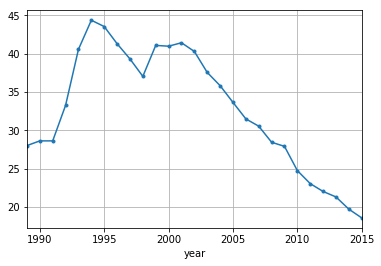

In [31]:
#Например, норм получается с Россией - резкий рост с пиком в 1994, а с 2001 наблюдается только падение
agg_country_year[agg_country_year.country == 'Russian Federation'].set_index('year')['suicides/100k'].plot(kind='line', style='.-')
plt.grid()


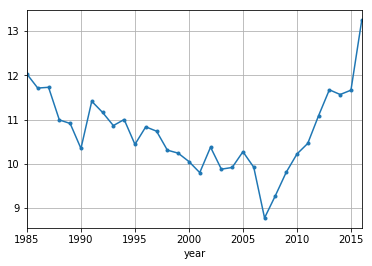

In [34]:
#А в Нидерландах с 2007 года почему-то все резко стали убиваться
agg_country_year[agg_country_year.country == 'Netherlands'].set_index('year')['suicides/100k'].plot(kind='line', style='.-')
plt.grid()


Можно разные страны попробовать, где-то получится прикольно

### Зафиксировать год и посмотреть частоту самоубийств на 100к населения

Предварительно нужно оставить страны с большим населением, чтоб мелкие страны, в которых убились два Ивана (в пределах погрешности) не вылезли в топ. Год лучше взять посвежее, чтоб получить наиболее похожую на сегодня картину

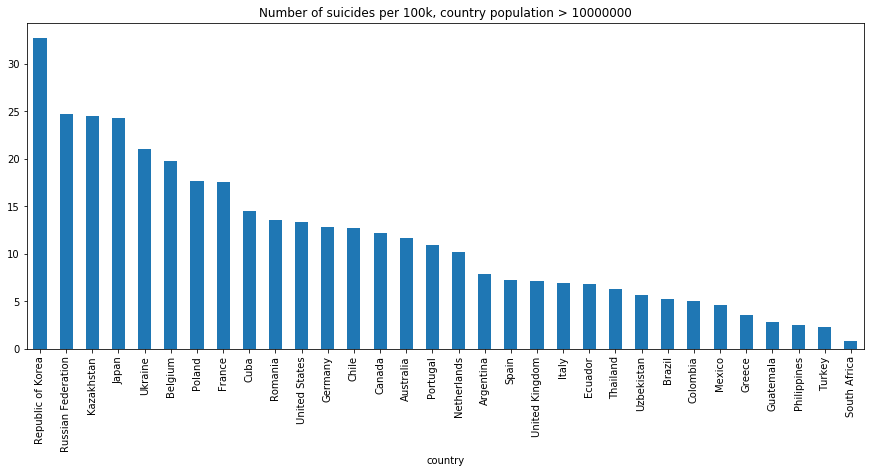

In [49]:
fig = plt.figure(figsize=(15,6))
agg_country_year[(agg_country_year.population > 10000000) & (agg_country_year.year == 2010)].set_index('country')['suicides/100k'].sort_values(ascending=False).plot(kind='bar', title='Number of suicides per 100k, country population > 10000000')

Из интересного - второй после Кореи, про самоубийства в которой даже статью на википедии написали, настолько там все херово с этим, идет Россия. 

### Кол-во суицидов во всем мире по годам

А какова динамика количества самоубийств во всем мире? Можно просуммировать количество самоубийств во всем мире по годам, просуммировать население в мире (ну на самом деле конечно не во всем мире, а в тех странах, которые есть в данных, а в данных где-то четверть всего населения только, но учитывая, что в них представлены страны разного уровня жизни и частей света, можно рискнуть обобщить на весь мир), разделить одно на другое, получить количество самоубийств на 100к по всему миру, и посмотреть, как в зависимости от года изменяется эта величина:

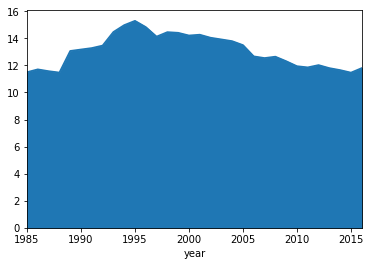

In [65]:
(agg_country_year.groupby('year')['suicides_no'].sum() / agg_country_year.groupby('year')['population'].sum()*100000).plot(kind='area')

Получается, что в 1985 и 2016 году количество самоубийств на 100к во всем мире примерно одинаково, однако в промежутке между этими годами наблюдался сначала правный рост, а потом падение. Пик частоты самоубийств в мире пришелся на 1995 год&